<a href="https://colab.research.google.com/github/basilkjoseph/Final_Year_Project/blob/main/LSTM_daily_Datapoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error
from math import sqrt

In [37]:
df=pd.read_csv('https://raw.githubusercontent.com/anantgupta129/Solar-Power-Generation-Forecasting/main/solarpowergeneration.csv')
df

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


In [38]:
features = df.loc[:,['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd', 'wind_speed_80_m_above_gnd', 'shortwave_radiation_backwards_sfc','generated_power_kw']]
target = df.loc[:,['generated_power_kw']]

In [39]:
print(features.shape)
print(target.shape)

(4213, 5)
(4213, 1)


In [40]:
features_scaler = MinMaxScaler()
features_scaled = features_scaler.fit_transform(features)
target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target)
time_steps=6

In [41]:
def Reshape(features,target,time_steps):
  new_features=[]
  new_target=[]
  for i in range(features.shape[0] - time_steps):
    new_features.append([features[j+i] for j in range(time_steps)])
    new_target.append(target[i+time_steps])
  return new_features,new_target
X_data, y_data = Reshape(features_scaled,target_scaled,time_steps)
X_data=np.array(X_data)
y_data=np.array(y_data)

In [42]:
print(X_data.shape)
print(y_data.shape)

(4207, 6, 5)
(4207, 1)


In [43]:
test_train_split= int(0.8*X_data.shape[0])
n_features=X_data.shape[2]

In [44]:
X_train=X_data[:test_train_split]
y_train=y_data[:test_train_split]

X_test=X_data[test_train_split:]
y_test=y_data[test_train_split:]

In [45]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(n_features)

(3365, 6, 5)
(3365, 1)
(842, 6, 5)
(842, 1)
5


In [46]:
#2 Layer LSTM
model1 = Sequential()
model1.add(InputLayer((time_steps, n_features)))
model1.add(LSTM(256, return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(128, return_sequences=False))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [47]:
cp1=ModelCheckpoint('model1.keras',save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [48]:
model1.fit(X_train, y_train, epochs=50, callbacks=[cp1], validation_split=0.2)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.1401 - root_mean_squared_error: 0.3718 - val_loss: 0.0616 - val_root_mean_squared_error: 0.2483
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0680 - root_mean_squared_error: 0.2607 - val_loss: 0.0434 - val_root_mean_squared_error: 0.2082
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0552 - root_mean_squared_error: 0.2350 - val_loss: 0.0411 - val_root_mean_squared_error: 0.2026
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0488 - root_mean_squared_error: 0.2207 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1858
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0406 - root_mean_squared_error: 0.2014 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1702
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0346 - root_mean_squared_error: 0.1858 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1606
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss:

In [49]:
from tensorflow.keras.models import load_model
model1=load_model('model1.keras')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


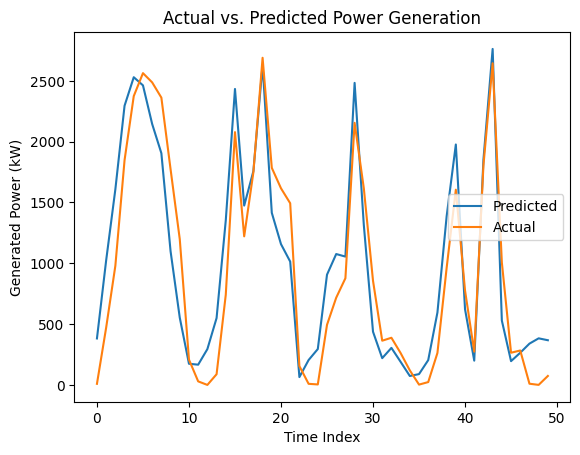

In [61]:
import matplotlib.pyplot as plt
predictions = model1.predict(X_test)
test_predictions = target_scaler.inverse_transform(predictions).flatten()
test_actuals = target_scaler.inverse_transform(y_test).flatten()
# y_test_rescaled = y_test_rescaled.flatten()
#test_predictions=predictions_rescaled.flatten()
test_results=pd.DataFrame(data={'Predictions':test_predictions[1:],'Actuals':test_actuals[:-1]})
plt.plot(test_results['Predictions'][:50],label='Predicted')
plt.plot(test_results['Actuals'][:50],label='Actual')
plt.legend()
plt.xlabel('Time Index')
plt.ylabel('Generated Power (kW)')
plt.title("Actual vs. Predicted Power Generation")
plt.show()

In [62]:
from math import sqrt
rmse1 = np.sqrt(mean_squared_error(test_results['Predictions'], test_results['Actuals']))
Maximum=(test_results['Actuals']).max()
Mean=(test_results['Actuals']).mean()
accuracy1=100-(rmse1/Maximum)*100
accuracy2=100-(rmse1/Mean)*100
print(f"LSTM ACCURACY wrt Maximum: {accuracy1}")
print(f"LSTM ACCURACY wrt Mean: {accuracy2}")

LSTM ACCURACY wrt Maximum: 87.20244816883458
LSTM ACCURACY wrt Mean: 64.08603214231726


In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(test_actuals,test_predictions)
mse = mean_squared_error(test_actuals,test_predictions)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(test_actuals,test_predictions)
r2 = r2_score(test_actuals,test_predictions)

In [64]:

print("Mean Absolute Error = ", mae)
print("Mean Squared Error = ", mse)
print("Root Mean Squared Error =", rmse)
print("Mean Absolute Percentage Error =", mape)
print("r2 Score =", r2)


Mean Absolute Error =  283.7147830023379
Mean Squared Error =  166201.51815112584
Root Mean Squared Error = 407.67820416490974
Mean Absolute Percentage Error = 104.68803840959873
r2 Score = 0.7985168978498187
